In [133]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [135]:
df2 = pd.read_csv("airplane2.csv")
df2.head()
#renamed some variables to better suit my code. i.e. Fuel gal/lbs -> Fuel_gal_over_lbs & Takeoff over 50ft -> Takeoff_over_50ft

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel_gal_over_lbs,All eng service ceiling,Eng out service ceiling,...,Takeoff_over_50ft,Takeoff ground run,Landing over 50ft,Landing ground roll,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.
0,15 AC Sedan,Aeronca,Piston,145,104,91,46,36.0,13000.0,NaN,...,900.0,NaN,1300.0,NaN,2050,1180,25/3,10/3,37/5,370
1,11 CC Super Chief,Aeronca,Piston,85,89,83,44,15.0,12300.0,NaN,...,720.0,NaN,800.0,NaN,1350,820,20/7,8/9,36/1,190
2,7 CCM Champ,Aeronca,Piston,90,90,78,37,19.0,16000.0,NaN,...,475.0,NaN,850.0,NaN,1300,810,21/5,8/7,35/0,210
3,7 DC Champ,Aeronca,Piston,85,88,78,37,19.0,13000.0,NaN,...,500.0,NaN,850.0,NaN,1300,800,21/5,8/7,35/0,210
4,7 AC Champ,Aeronca,Piston,65,83,74,33,14.0,12500.0,NaN,...,632.0,NaN,885.0,NaN,1220,740,21/5,8/9,35/0,175


In [136]:
df["log_Global_Sales"] = np.log(df["Global_Sales"])


For my os models I choose the y values as the intercept and the x values for my slope. Reason why I chose this is because x determines the slope of a graph and y determines the intercept.

In [137]:
df_ols = smf.ols('NA_Sales~ 1 + log_Global_Sales', data = df)
df_fit = df_ols.fit()
df_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     5520.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:38:24   Log-Likelihood:                -17807.
No. Observations:               16598   AIC:                         3.562e+04
Df Residuals:                   16596   BIC:                         3.563e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7503      0.009     87.886      0.000       0.734       0.767
log_Global_Sales     0.2791      0.004     74.294      0.000       0.272       0.286
==============================================================================
Omnibus:                    38783.763   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        599799306.519
Skew:                          22.994   Prob(JB):                         0.00
Kurtosis:                     933.145   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
fit_intercept = df_fit.params["Intercept"]
fit_logglobal_slope = df_fit.params["log_Global_Sales"]

print(f"The intercept is {fit_intercept}\nand the slope of global is {fit_logglobal_slope}")

The intercept is 0.7503225817450765
and the slope of global is 0.27908259308103467


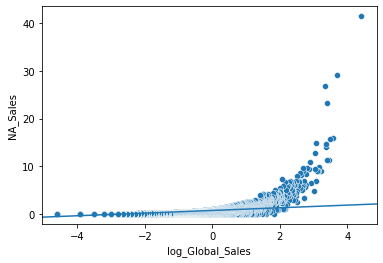

In [139]:
sns.scatterplot(data= df, x="log_Global_Sales", y="NA_Sales")
plt.axline([0, fit_intercept], slope = fit_logglobal_slope)

In [140]:
predicted_ys = fit_intercept + (fit_logglobal_slope * df["log_Global_Sales"])


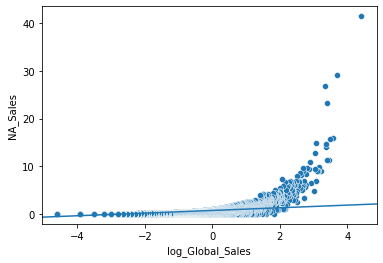

In [141]:
sns.scatterplot(data= df, x="log_Global_Sales", y="NA_Sales")
plt.axline([0, fit_intercept], slope = fit_logglobal_slope)

In [142]:
df2_ols = smf.ols('Takeoff_over_50ft ~ 1 + Fuel_gal_over_lbs', data = df2)
df2_fit = df2_ols.fit()
df2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Takeoff_over_50ft   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     880.1
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          8.49e-125
Time:                        23:38:24   Log-Likelihood:                -5493.3
No. Observations:                 683   AIC:                         1.099e+04
Df Residuals:                     681   BIC:                         1.100e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1722.7548     30.340     56.781      0.000    1663.183    1782.326
Fuel_gal_over_lbs     0.2178      0.007     29.667      0.000       0.203       0.232
==============================================================================
Omnibus:                       69.041   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.816
Skew:                           0.195   Prob(JB):                     1.12e-86
Kurtosis:                       6.709   Cond. No.                     4.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
fit_intercept2 = df2_fit.params["Intercept"]
fit_fuel = df2_fit.params["Fuel_gal_over_lbs"]

print(f"the intercept is {fit_intercept2}\nand the slope of fuel is {fit_fuel}")

the intercept is 1722.7547578689619
and the slope of fuel is 0.217790684254559


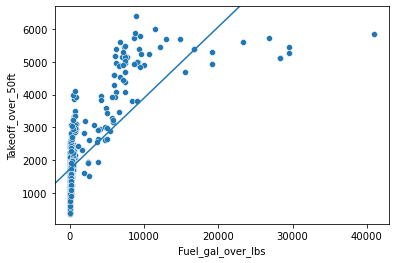

In [144]:
sns.scatterplot(data= df2, x="Fuel_gal_over_lbs", y="Takeoff_over_50ft")
plt.axline([0, fit_intercept2], slope = fit_fuel)

In [145]:
predicted_ys2 = fit_intercept2 + (fit_fuel * df2["Fuel_gal_over_lbs"])

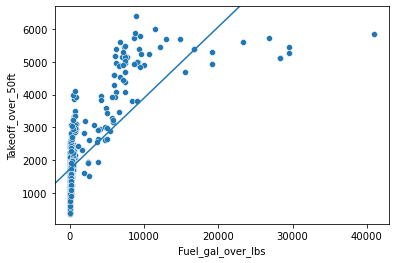

In [146]:
sns.scatterplot(data= df2, x="Fuel_gal_over_lbs", y="Takeoff_over_50ft")
plt.axline([0, fit_intercept2], slope = fit_fuel)

____________________________________________________________________________________________________________________________________________________________

In [147]:
mse_fit1 = ((df["NA_Sales"] - predicted_ys)**2).mean()
print(mse_fit1)

0.5004799701766887


In [148]:
adjustment_to_intercept = .1 
adjusted_intercept = fit_intercept + adjustment_to_intercept
predictions = adjusted_intercept + (fit_logglobal_slope * df["NA_Sales"]) 
MSE_after_adjustments = ((df["log_Global_Sales"] - predictions)**2).mean()
print(MSE_after_adjustments)

8.95499680994709


In [149]:
adjustment_to_intercept2 = -.1 

adjusted_intercept2 = fit_intercept + adjustment_to_intercept2
predictions2 = adjusted_intercept2 + (fit_logglobal_slope * df["NA_Sales"]) 
MSE_after_adjustments2 = ((df["log_Global_Sales"] - predictions2)**2).mean()
print(MSE_after_adjustments2)

7.929248420963838


In [150]:
adjustment_to_slope = .1 
adjusted_slope = fit_logglobal_slope + adjustment_to_slope

predictions3 = fit_intercept + (adjusted_slope * df["NA_Sales"]) 
MSE_after_adjustments3 = ((df["log_Global_Sales"] - predictions3)**2).mean()
print(MSE_after_adjustments3)

8.493174861594792


In [151]:
adjustment_to_slope2 = -0.1 
adjusted_slope2 = fit_logglobal_slope + adjustment_to_slope2

predictions4 = fit_intercept + (adjusted_slope2 * df["NA_Sales"]) 
MSE_after_adjustments4= ((df["log_Global_Sales"] - predictions4)**2).mean()
print(MSE_after_adjustments4)

8.385809966013511


In [152]:
adjustment_to_intercept_final = 0.1 # change this value up or down from zero to see the impact on MSE
adjustment_to_slope_final = 0.1 # change this value up or down from zero to see the impact on MSE

adjusted_intercept_final = fit_intercept + adjustment_to_intercept_final
adjusted_slope_final = fit_logglobal_slope + adjustment_to_slope_final

predictions_final = adjusted_intercept_final + (adjusted_slope_final * df["NA_Sales"]) # predictions from linear equation
MSE_after_adjustments_final = ((df["log_Global_Sales"] - predictions_final)**2).mean()
print(MSE_after_adjustments_final)

9.021342404683176


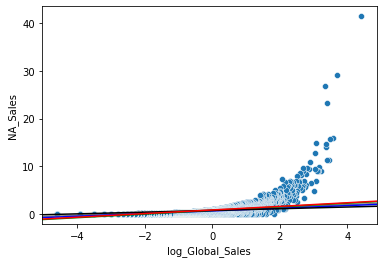

In [153]:
sns.scatterplot(data= df, x="log_Global_Sales", y="NA_Sales")
plt.axline([0, adjusted_intercept], slope = fit_logglobal_slope, color = "gray")
plt.axline([0, adjusted_intercept2], slope = fit_logglobal_slope, color = "blue")
plt.axline([0, fit_intercept], slope = adjusted_slope, color = "green")
plt.axline([0, fit_intercept], slope = adjusted_slope2, color = "black")
plt.axline([0, adjusted_intercept_final], slope = adjusted_slope_final, color = "red")

____________________________________________________________________________________________________________________________________________________________

https://www.kaggle.com/datasets/rajanand/rainfall-in-india
The dataset I plan on using is the rainfall in India thorughout the months. Provided by Ross Zaslavsky

In [156]:
df3= pd.read_csv("district wise rainfall normal.csv")
df3.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


<AxesSubplot:xlabel='ANNUAL', ylabel='JAN'>

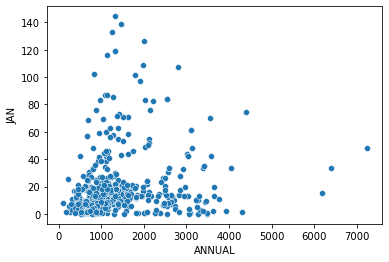

In [158]:
sns.scatterplot(data= df3, x="ANNUAL", y="JAN")

In [160]:
df3_ols = smf.ols('JAN~ 1 + ANNUAL', data = df3)
df3_fit = df3_ols.fit()
df3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    JAN   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     17.46
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           3.35e-05
Time:                        01:36:48   Log-Likelihood:                -2854.5
No. Observations:                 641   AIC:                             5713.
Df Residuals:                     639   BIC:                             5722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8348      1.556      8.248      0.000       9.779      15.891
ANNUAL         0.0041      0.001      4.178      0.000       0.002       0.006
==============================================================================
Omnibus:                      413.149   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3672.628
Skew:                           2.868   Prob(JB):                         0.00
Kurtosis:                      13.227   Cond. No.                     3.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
fit_intercept3 = df3_fit.params["Intercept"]
fit_Ann_slope = df3_fit.params["ANNUAL"]

print(f"The intercept is {fit_intercept3}\nand the slope of Annual is {fit_Ann_slope}")

The intercept is 12.834836477487315
and the slope of Annual is 0.004098261617985283


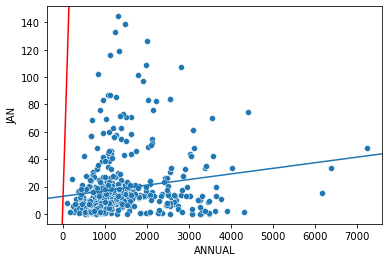

In [177]:
sns.scatterplot(data= df3, x="ANNUAL", y="JAN")
plt.axline([0, fit_intercept3], slope = fit_Ann_slope)
plt.axline([0,0], slope = 1, color ="red")

It is consistent with the regression to the mean

More numbers = more values, which means that the more common numbers will take up the bulk of the results, leaning downwards as a result.